In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data_raw = pd.read_csv('UFC_data_raw_2021-03-11.csv')

data_clean = data_raw

In [4]:
data_clean.head(20)

,Unnamed: 0,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
0,2,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0,NaN
1,3,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,NaN
2,4,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,NaN
3,5,Shamil,Abdurakhimov,Abrek,"6' 3""",235 lbs.,"76.0""",Orthodox,20,5,0,NaN
4,6,Hiroyuki,Abe,Abe Ani,"5' 6""",145 lbs.,--,Orthodox,8,15,3,NaN
5,7,Daichi,Abe,NaN,"5' 11""",170 lbs.,"71.0""",Orthodox,6,2,0,NaN
6,8,Papy,Abedi,Makambo,"5' 11""",185 lbs.,--,Southpaw,10,4,0,NaN
7,9,Ricardo,Abreu,Demente,"5' 11""",185 lbs.,--,Orthodox,5,1,0,NaN
8,10,Klidson,Abreu,White Bear,"6' 0""",205 lbs.,"74.0""",Orthodox,15,4,0,NaN
9,11,Daniel,Acacio,NaN,"5' 8""",180 lbs.,--,Orthodox,30,18,0,NaN


In [5]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3598 non-null   int64  
 1   First       3598 non-null   object 
 2   Last        3598 non-null   object 
 3   Nickname    1908 non-null   object 
 4   Ht.         3598 non-null   object 
 5   Wt.         3598 non-null   object 
 6   Reach       3598 non-null   object 
 7   Stance      2794 non-null   object 
 8   W           3598 non-null   int64  
 9   L           3598 non-null   int64  
 10  D           3598 non-null   int64  
 11  Belt        0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 337.4+ KB


In [6]:
data_clean = data_clean.drop(['Unnamed: 0', 'Belt'], axis = 1)
data_clean.columns = ['first_name', 'last_name', 'nickname', 'height', 'weight_lbs', 'armspan_inches', 'stance', 'wins', 'losses', 'draws']

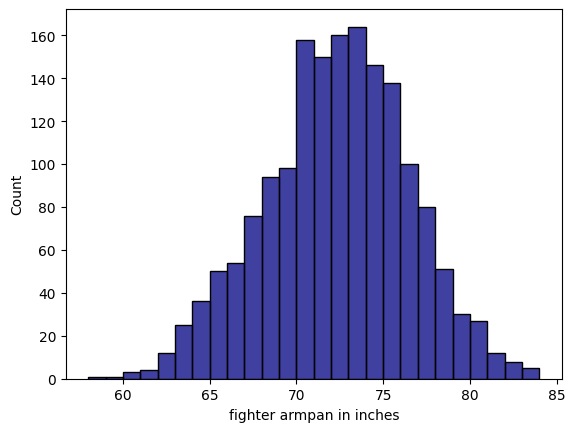

In [7]:
data_clean.loc[data_clean.armspan_inches =='--','armspan_inches'] = np.nan

data_clean.armspan_inches = (data_clean.armspan_inches
                                .str.replace('\"','')
                                .astype('float'))

sns.histplot(data = data_clean, x = 'armspan_inches', color = 'navy')
plt.xlabel('fighter armpan in inches')
plt.show()

In [8]:
data_clean.height = data_clean.height.str.replace('\"','')

data_clean.loc[data_clean.height == '--','height'] = np.nan
data_clean.loc[:,'height_split'] = data_clean.height.str.split('\' ')
data_clean.loc[:,'height_split']

0           NaN
1       [5, 11]
2        [6, 0]
3        [6, 3]
4        [5, 6]
         ...   
3593        NaN
3594        NaN
3595     [5, 9]
3596     [5, 7]
3597     [6, 2]
Name: height_split, Length: 3598, dtype: object

In [9]:
data_clean.loc[:,'height_ft'] = [row[0] if isinstance(row,list) else np.nan for row in data_clean.height_split]

data_clean.loc[:,'height_inches'] = [row[1] if isinstance(row,list) else np.nan for row in data_clean.height_split]

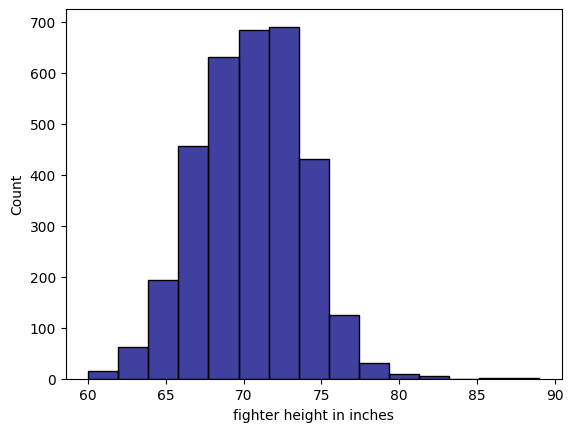

In [10]:
data_clean.loc[:,'height'] = data_clean.loc[:,'height_inches'].astype('float') + (data_clean.loc[:,'height_ft'].astype('float')*12)

data_clean = data_clean.drop(columns = ['height_inches','height_ft','height_split']).rename(columns = {'height':'height_inches'})

sns.histplot(data = data_clean, x = 'height_inches', color = 'navy',bins = 15)
plt.xlabel('fighter height in inches')
plt.show()

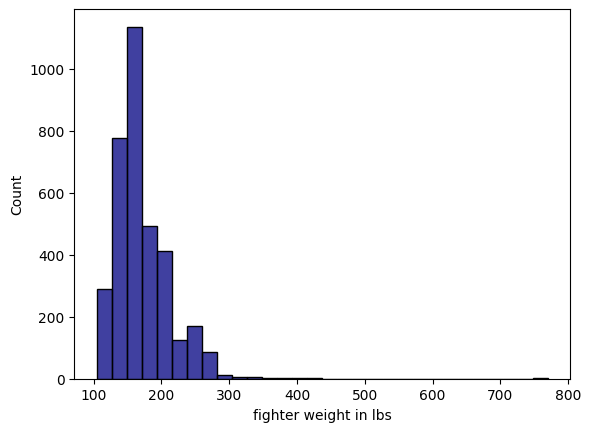

In [11]:
data_clean.loc[data_clean.weight_lbs =='--','weight_lbs'] = np.nan
data_clean.weight_lbs= data_clean.weight_lbs.str.replace(' lbs','').astype('float')

sns.histplot(data = data_clean, x = 'weight_lbs', color = 'navy', bins = 30)
plt.xlabel('fighter weight in lbs')
plt.show()

In [12]:
data_clean.weight_lbs.sort_values(ascending = False)

3544    770.0
3302    430.0
2615    410.0
2518    400.0
2006    400.0
        ...  
3265      NaN
3415      NaN
3491      NaN
3505      NaN
3519      NaN
Name: weight_lbs, Length: 3598, dtype: float64

In [13]:
data_clean.loc[data_clean.weight_lbs == 770,:]

,first_name,last_name,nickname,height_inches,weight_lbs,armspan_inches,stance,wins,losses,draws
3544,Emmanuel,Yarborough,NaN,80.0,770.0,NaN,Open Stance,1,2,0


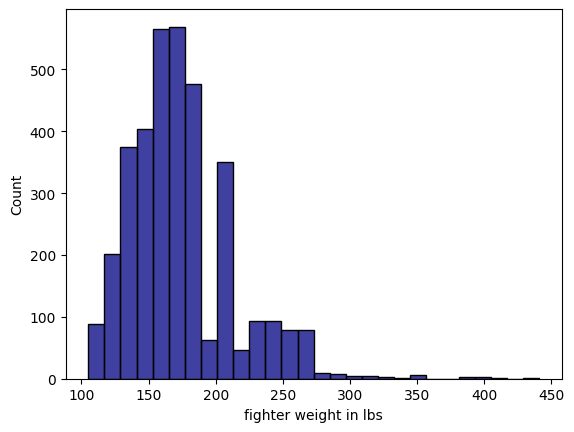

In [14]:
without_emmanuel = data_clean.loc[data_clean.weight_lbs < 770,:]

sns.histplot(data = without_emmanuel, x = 'weight_lbs', color = 'navy', binwidth=12)
plt.xlabel('fighter weight in lbs')
plt.show()

In [18]:
data_clean.loc[:,'stance'] = data_clean.loc[:,'stance'].fillna('Missing')
data_clean.value_counts('stance')

stance
Orthodox       2166
Missing         804
Southpaw        492
Switch          126
Open Stance       7
Sideways          3
dtype: int64

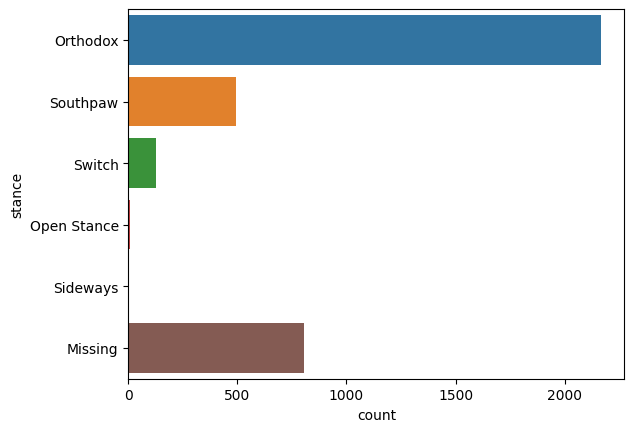

In [19]:
sns.countplot(y = 'stance', data = data_clean, order = ['Orthodox', 'Southpaw','Switch','Open Stance','Sideways','Missing'])
plt.show()

In [20]:
data_clean.loc[:,'total_fights'] = (data_clean
                                        .loc[:,['wins','draws','losses']]
                                        .sum(axis = 1))

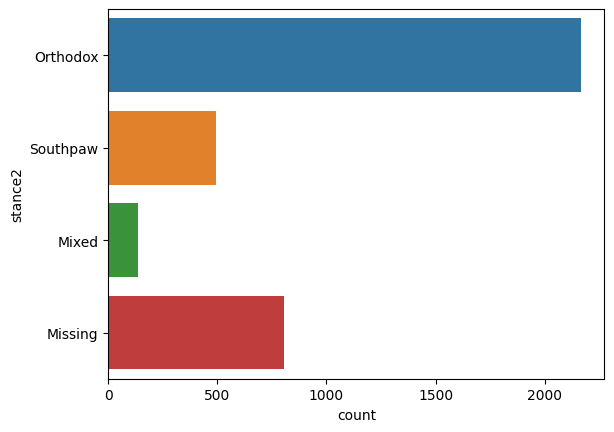

In [21]:
mapping = {'Open Stance':'Mixed','Sideways':'Mixed','Switch':'Mixed'}
data_clean.loc[:,'stance2'] = data_clean.loc[:,'stance'].replace(mapping)

sns.countplot(y = 'stance2', data=data_clean, order = ['Orthodox','Southpaw','Mixed','Missing'])

plt.show()

In [ ]:
#write.csv(data_clean, 'UFC_data_cleaned.csv')

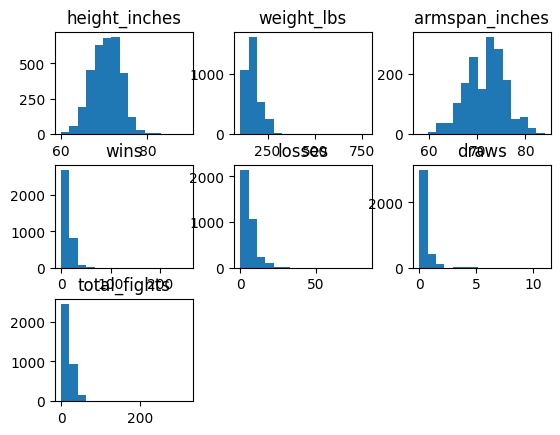

In [22]:
data_clean.hist(grid = False, bins = 15)
plt.show()

In [23]:
data_clean.loc[data_clean.total_fights > 100,:]

,first_name,last_name,nickname,height_inches,weight_lbs,armspan_inches,stance,wins,losses,draws,total_fights,stance2
1034,Travis,Fulton,The Ironman,72.0,240.0,NaN,Orthodox,253,53,10,316,Orthodox
1398,Jeremy,Horn,Gumby,73.0,185.0,74.0,Orthodox,91,22,5,118,Orthodox
1680,Yuki,Kondo,NaN,71.0,183.0,NaN,Southpaw,60,33,9,102,Southpaw
2126,Ikuhisa,Minowa,Minowaman,69.0,181.0,NaN,Orthodox,60,42,8,110,Orthodox
2642,Dennis,Reed,NaN,NaN,205.0,NaN,Orthodox,45,62,1,108,Orthodox
2690,Shannon,Ritch,The Cannon,69.0,190.0,NaN,Orthodox,56,83,0,139,Orthodox
2941,Dan,Severn,The Beast,74.0,250.0,NaN,Southpaw,101,19,1,121,Southpaw


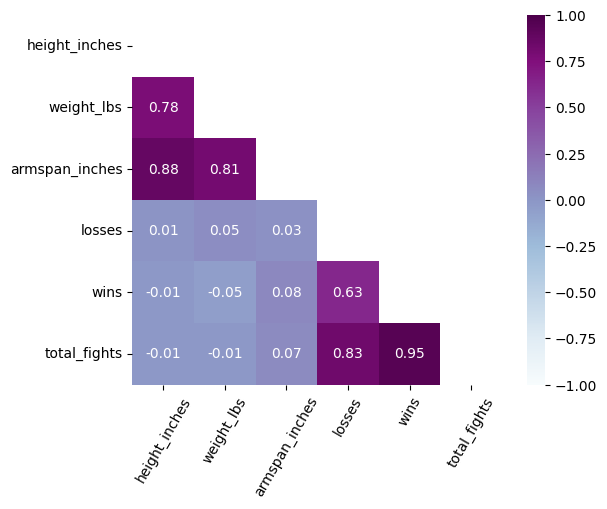

In [28]:
correlation_matrix = data_clean.loc[:,['height_inches', 'weight_lbs', 'armspan_inches', 'losses', 'wins','total_fights']].corr(method = 'spearman').round(2)
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, annot=True,vmin = -1, vmax=1,mask=mask, square=True, cmap="BuPu")
plt.xticks(rotation = 60)
plt.yticks(rotation = 0)
plt.show()

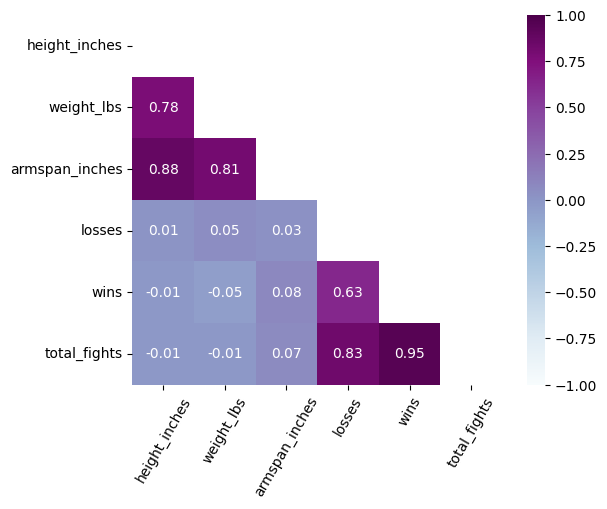

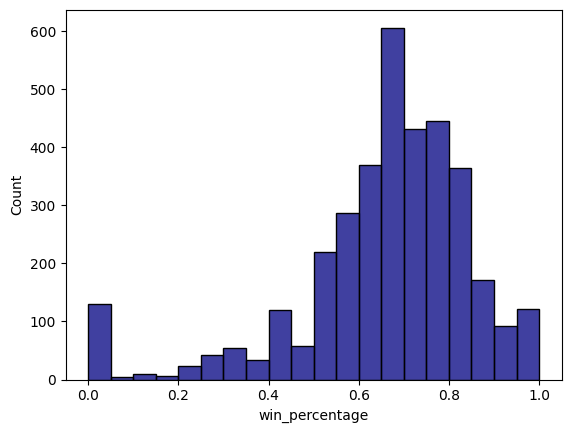

In [29]:
data_clean.loc[:,'win_percentage'] = (data_clean.loc[:,'wins']+ (0.5*data_clean.loc[:,'draws']) )/data_clean.loc[:,'total_fights']

sns.histplot(data = data_clean, x = 'win_percentage', color = 'navy', bins = 20)
plt.show()

In [33]:
data_model = data_clean.loc[:, ['armspan_inches', 'height_inches', 'weight_lbs']].dropna()
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 3 to 3597
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   armspan_inches  1682 non-null   float64
 1   height_inches   1682 non-null   float64
 2   weight_lbs      1682 non-null   float64
dtypes: float64(3)
memory usage: 52.6 KB


In [35]:
X = data_model.loc[:,['height_inches','weight_lbs']]
X = sm.add_constant(X)
y = data_model.loc[:,'armspan_inches']

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         armspan_inches   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3256.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:21:53   Log-Likelihood:                -3456.7
No. Observations:                1682   AIC:                             6919.
Df Residuals:                    1679   BIC:                             6936.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2650      1.239      3.443      0.001       1.835       6.695
height_inches     0.9241      0.021     43.083      0.000       0.882       0.966
weight_lbs        0.0171      0.002      7.788      0.000       0.013       0.021
==============================================================================
Omnibus:                       12.319   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.466
Skew:                           0.211   Prob(JB):                      0.00196
Kurtosis:                       3.001   Cond. No.                     4.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
data_model2 = data_clean.loc[:,['armspan_inches','height_inches','weight_lbs', 'win_percentage']].dropna()

X = data_model2.loc[:,['height_inches','weight_lbs','armspan_inches']]
X = sm.add_constant(X)
y = data_model2.loc[:,'win_percentage']
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.008
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           0.000454
Time:                        10:22:39   Log-Likelihood:                 1357.2
No. Observations:                1682   AIC:                            -2706.
Df Residuals:                    1678   BIC:                            -2685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5775      0.071      8.126      0.000       0.438       0.717
height_inches     -0.0027      0.002     -1.503      0.133      -0.006       0.001
weight_lbs        -0.0002      0.000     -1.199      0.231      -0.000    9.71e-05
armspan_inches     0.0051      0.001      3.672      0.000       0.002       0.008
==============================================================================
Omnibus:                       56.882   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.160
Skew:                          -0.097   Prob(JB):                     4.97e-32
Kurtosis:                       4.421   Cond. No.                     5.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
data_clean.loc[data_clean.weight_lbs == 155,'armspan_inches'].agg(['min','max'])

min    64.0
max    80.0
Name: armspan_inches, dtype: float64